In [1]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras import datasets, layers, models
from keras.preprocessing import image
from keras.models import Sequential
import matplotlib.pyplot as plt
from pathlib import Path
import tensorflow as tf
import numpy as np
import random
import keras
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import class_likelihood_ratios, confusion_matrix

Preprocessing our image data

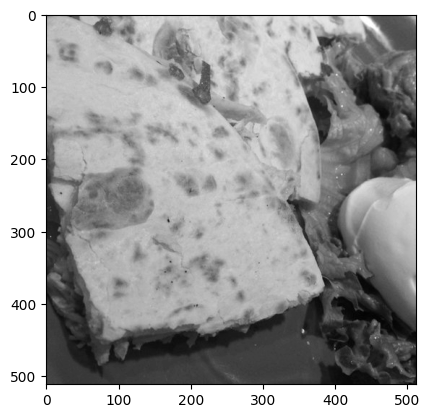

In [6]:
DATADIR ="./Dataset/"
# CATEGORIES = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
CATEGORIES = ["Bread","Dairy Product","Dessert","Egg","Fried food","Meat","Noodles-Pasta","Rice","Seafood","Soup","Vegetable-Fruit"]

for cat in CATEGORIES:
    path= os.path.join(DATADIR, cat)
    for img in os.listdir(path):

        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        break
    break

In [5]:
print(img_array.shape)

(512, 512, 3)


In [202]:
IMG_SIZE=60
# new_array=cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
# print(new_array.shape)

In [203]:
training_data=[]

def create_training_data():
    for cat in CATEGORIES:
        path= os.path.join(DATADIR, cat)
        class_num = CATEGORIES.index(cat)
        for img in os.listdir(path):
            try:
                 img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                 new_array=cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
                 training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [204]:
print(len(training_data))

13434


In [268]:
random.shuffle(training_data)

# print(training_data)

In [269]:
for sample in training_data[:10]:
    print(sample[1])

8
6
9
8
9
5
2
9
3
8


In [270]:
X=[]
y=[]

for features, label in training_data:
    X.append(features)
    y.append(label)

X=np.array(X).reshape(-1, IMG_SIZE,IMG_SIZE,1)

In [271]:
import pickle

pickle_out= open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out= open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [272]:
pickle_in=open("X.pickle","rb")
X=pickle.load(pickle_in)

In [273]:
y[1]

6

Spliting our Data into Training and testing (o.8 train & 0.2 Test)

In [274]:
train_X, test_X = train_test_split(X, test_size=0.2, random_state=42)
train_y, test_y = train_test_split(y, test_size=0.2, random_state=42)

In [275]:
from keras.models import Sequential
from keras import datasets, layers, models
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

Normalizing (0-1)

In [276]:

train_X=train_X/255
test_X=test_X/255


Desing our Model

In [310]:
# plt.imshow(train_X[0])
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3), activation= 'relu', input_shape=(IMG_SIZE,IMG_SIZE,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32,kernel_size=(3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32,kernel_size=(3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers. Dense(11,activation="softmax")


])


In [311]:
opt= keras.optimizers.Adam()
cnn.compile( optimizer=opt,
             loss ='sparse_categorical_crossentropy',
             metrics=['accuracy'] )

Fiting our Model with Dataset

In [312]:
# cnn.fit(train_X,train_y,epochs=5)

train_y=np.array(train_y)
test_y=np.array(test_y)

history=cnn.fit(train_X,train_y,epochs=10,batch_size=32, validation_data=(test_X, test_y))


Epoch 1/10
336/336 [==============================] - 21s 61ms/step - loss: 2.1996 - accuracy: 0.2114 - val_loss: 2.0702 - val_accuracy: 0.2568
Epoch 2/10
336/336 [==============================] - 22s 64ms/step - loss: 1.9886 - accuracy: 0.3044 - val_loss: 1.9537 - val_accuracy: 0.3245
Epoch 3/10
336/336 [==============================] - 21s 64ms/step - loss: 1.8555 - accuracy: 0.3512 - val_loss: 1.8582 - val_accuracy: 0.3532
Epoch 4/10
336/336 [==============================] - 21s 62ms/step - loss: 1.7631 - accuracy: 0.3798 - val_loss: 1.8695 - val_accuracy: 0.3550
Epoch 5/10
336/336 [==============================] - 21s 63ms/step - loss: 1.6868 - accuracy: 0.4124 - val_loss: 1.7903 - val_accuracy: 0.3800
Epoch 6/10
336/336 [==============================] - 22s 64ms/step - loss: 1.6100 - accuracy: 0.4343 - val_loss: 1.7914 - val_accuracy: 0.3893
Epoch 7/10
336/336 [==============================] - 21s 62ms/step - loss: 1.5242 - accuracy: 0.4667 - val_loss: 1.7656 - val_accuracy:

In [313]:

cnn.evaluate(test_X,test_y)
cnn.summary()

84/84 [==============================] - 1s 11ms/step - loss: 1.8329 - accuracy: 0.4027
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 58, 58, 32)        320       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 29, 29, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 27, 27, 32)        9248      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 11, 11, 32)        9248      
                               

Testing output

1/1 [==============================] - 0s 68ms/step
Soup


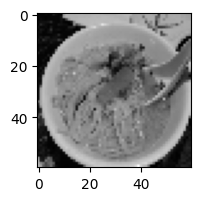

In [314]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
rnd=random.randint(0,len(test_y))
plt.figure(figsize=(20,2))
plt.imshow(test_X[rnd,:], cmap="gray")


y_pred=cnn.predict((test_X[rnd,:]).reshape(1,IMG_SIZE,IMG_SIZE))
# print(y_pred)
output= np.argmax(y_pred)
print(CATEGORIES[output])

Evaluating by classification Report

In [315]:
print(test_X.shape)
y_pred=cnn.predict(test_X[:,:])
print(type(test_y))
print(type(y_pred))
# print(y_pred)
print(y_pred.shape)
print(y_pred[0])
print(np.argmax(y_pred[0]))
print(test_y[1,])
y_classes= [np.argmax(element) for element in y_pred]

print(y_classes[0])
n_pred=np.array(y_classes)
print(n_pred.shape)
print(test_y.shape)

classification_report(test_y, n_pred, labels=None, target_names=CATEGORIES)
report_dict =classification_report(test_y, n_pred, labels=None, target_names=CATEGORIES)
print(report_dict)


(2687, 60, 60, 1)
84/84 [==============================] - 1s 11ms/step
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(2687, 11)
[0.30514267 0.04774728 0.05044243 0.06632993 0.08942331 0.14343631
 0.0219942  0.01398363 0.10122773 0.00446824 0.15580426]
0
2
0
(2687,)
(2687,)
                 precision    recall  f1-score   support

          Bread       0.31      0.31      0.31       279
  Dairy Product       0.38      0.09      0.15       166
        Dessert       0.33      0.37      0.35       395
            Egg       0.38      0.36      0.37       292
     Fried food       0.27      0.38      0.31       213
           Meat       0.50      0.50      0.50       387
  Noodles-Pasta       0.46      0.57      0.51       117
           Rice       0.38      0.23      0.29        66
        Seafood       0.36      0.17      0.23       223
           Soup       0.59      0.72      0.65       385
Vegetable-Fruit       0.29      0.37      0.32       164

       accuracy                      

PLoting Loss and Accuracy relationship

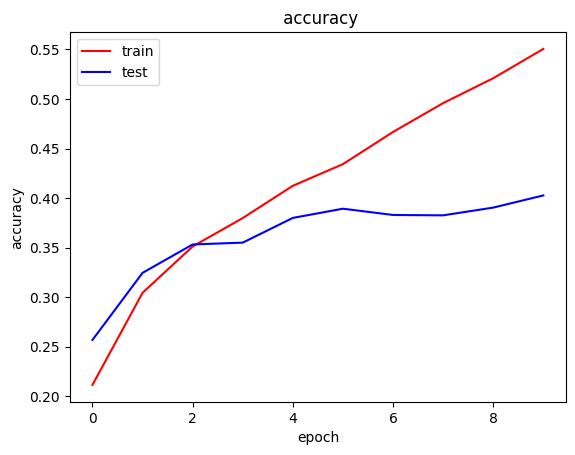

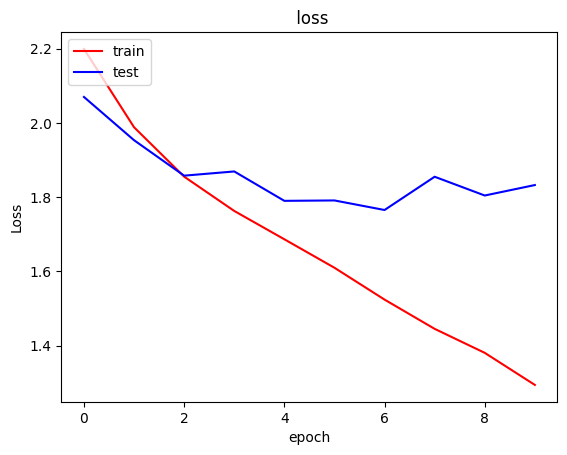

In [316]:


plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title(' accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.title(' loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
